<a href="https://colab.research.google.com/github/Anuragpandey2005/ola/blob/main/OLA_PROJECT_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Problem Statement:` Ola struggles with high driver churn and costly acquisitions, so we need to predict whether a driver will leave or stay.

`Objective:` Build and evaluate Machine learning models to predict driver attrition and provide insights for improving retention.

In [ ]:
import pandas as pd
df=pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

# Understanding

In [ ]:
df.info()
df=df.drop('Unnamed: 0',axis=1)#removed unnessary column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.head(10)

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.shape

(19104, 13)

In [ ]:
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'],errors='coerce')
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'],errors='coerce')
df

/tmp/ipython-input-733293316.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'],errors='coerce')
/tmp/ipython-input-733293316.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'],errors='coerce')


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [ ]:
#detect The Columns with null values
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


Most of the Null values were in `LastWorkingDate`

# Data Cleaning And Preparation

#### Filling Null Values

In [ ]:
df['Age']=df['Age'].fillna(int(df['Age'].mean()))                         #filling null values of age with the mean age
mode=df['Gender'].mode()
df['Gender']=df['Gender'].fillna(int(mode[0]))                            #filling null values of gender with the mode gender
df.isnull().sum()
df=df.rename(columns={'MMM-YY':'Reportingdate'})                          #changed the mmm-yy column to reportingdate column for better understanding


##### Changed To Appropriate Datatype

In [ ]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)

In [ ]:
# IQR Method To Detect Outliers
q1 = df['Total Business Value'].quantile(0.25)
q3 = df['Total Business Value'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Total Business Value'] < lower_bound) | (df['Total Business Value'] > upper_bound)]
print('No. Of Outliers :',outliers.shape[0])

No. Of Outliers : 1371


Their Is NO Point In Removing The Outlier Cause It Will Affect The Data And The Performance Of Every Driver Is Important So WE Will Keep The Outlier As It Is.

In [ ]:
df['Tenure_Days']=(df['LastWorkingDate']-df['Dateofjoining']).dt.days
df

,Reportingdate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure_Days
0,01/01/19,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,NaN
1,02/01/19,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,NaN
2,03/01/19,1,28,0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,77.0
3,11/01/20,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN
4,12/01/20,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,NaN
19100,09/01/20,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,NaN
19101,10/01/20,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,0,2,NaN
19102,11/01/20,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,NaN


In [ ]:
import numpy as np
df["Target"] = np.where(df["LastWorkingDate"].notna(), 1, 0)

In [ ]:
gopi=df["Target"].sum()
print(f"Driver Left: {gopi}")

Driver Left: 1616


In [ ]:
df.groupby(df['Total Business Value'] < 0)['Target'].sum()

,Target
Total Business Value,
False,1585
True,31


False means `Total Business Value` > `0`

True  means `Total Business Value` < `0`

* This Suggests that Total Business Value Is Not a Strong Direct Indicator of Driver's Attrition







## **Visulization (Univariate Analysis)**



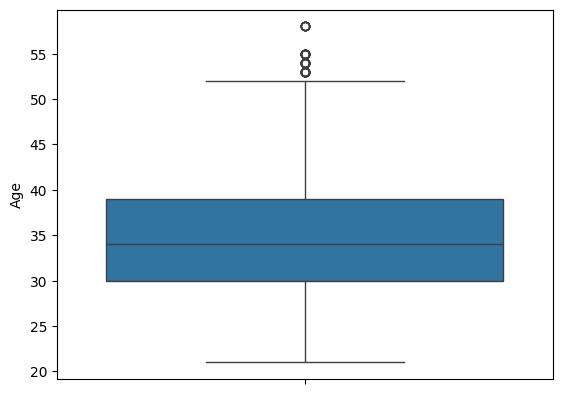

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y=df['Age'])
plt.show()

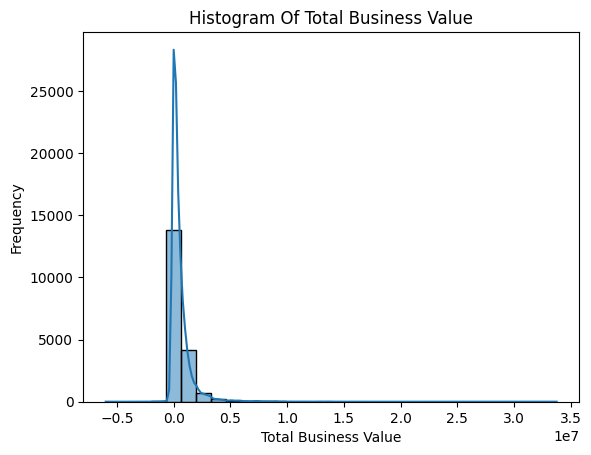

In [ ]:
sns.histplot(data=df,x='Total Business Value',bins=30,kde=True)
plt.title("Histogram Of Total Business Value")
plt.ylabel('Frequency')
plt.show()

### **Visualization (Bivariate Analysis)**

<Axes: >

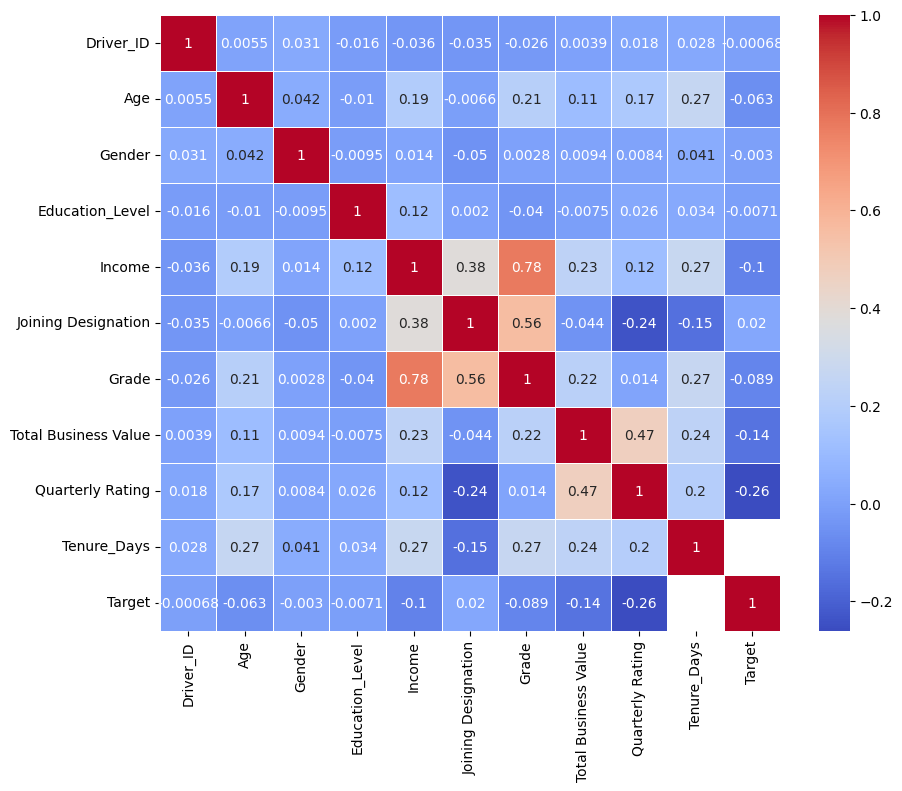

In [ ]:
numeric_df=df.select_dtypes(include='number')
corr=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

**The Columns Are Not That Correlated :**    
      

*   Most Correlated: Grade-Income
*   Least Correlated: Quarterly Rating - Target





In [ ]:
#converted ReportDate In Datetime Format
df['Reportingdate']=pd.to_datetime(df['Reportingdate'],errors='coerce')
df

/tmp/ipython-input-2591182952.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Reportingdate']=pd.to_datetime(df['Reportingdate'],errors='coerce')


,Reportingdate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure_Days,Target
0,2019-01-01,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,NaN,0
1,2019-02-01,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,NaN,0
2,2019-03-01,1,28,0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,77.0,1
3,2020-11-01,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,0
4,2020-12-01,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,NaN,0
19100,2020-09-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,NaN,0
19101,2020-10-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,0,2,NaN,0
19102,2020-11-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,NaN,0


In [ ]:
df.groupby('Education_Level')['Income'].mean()

,Income
Education_Level,
0,60644.080670
1,66362.592366
2,69561.404299


* Higher Education Means Higher Payment

In [ ]:
#Checking If Income Is A Reasone for Driver's Attrition
df.groupby('Target')['Income'].mean()

,Income
Target,
0,66600.170631
1,55391.400990


* Lower Income Is A Reason For Driver's Attrition

In [ ]:
df.groupby('Target')['Age'].mean().astype(int)

,Age
Target,
0,34
1,33


* The Younger Drivers are Most Likely To Leave

In [ ]:
df['Tenure_Group'] = pd.cut(df['Tenure_Days'], bins=[0, 30, 90, 180, 365, 730, 1095, df['Tenure_Days'].max()],
                            labels=['0-30', '31-90', '91-180', '181-365', '1-2Y', '2-3Y', '3Y+'])

grouped = df.groupby('Tenure_Group', observed=False)['Target'].sum()
grouped

,Target
Tenure_Group,
0-30,56
31-90,295
91-180,471
181-365,360
1-2Y,220
2-3Y,74
3Y+,136


<BarContainer object of 7 artists>

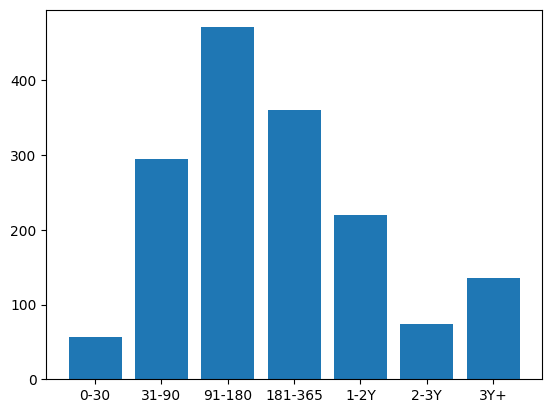

In [ ]:
plt.bar(x=grouped.index, height=grouped.values)

**Driver attrition is most likely to occur between 91 to 365 days of tenure.**

*  The **highest attrition** is observed in the **91–180 days** range, with 471 drivers leaving.
*  The **second highest** occurs in the **181–365** days range, with 360 drivers leaving.


*  This **trend suggests** that drivers are more prone to leave after **3 to 12 months of employment—possibly** due to job dissatisfaction, unmet expectations, or lack of engagement during the post-onboarding phase.





In [ ]:
df

,Reportingdate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure_Days,Target,Tenure_Group
0,2019-01-01,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,NaN,0,NaN
1,2019-02-01,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,NaN,0,NaN
2,2019-03-01,1,28,0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,77.0,1,31-90
3,2020-11-01,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,0,NaN
4,2020-12-01,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,NaN,0,NaN
19100,2020-09-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,NaN,0,NaN
19101,2020-10-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,0,2,NaN,0,NaN
19102,2020-11-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,NaN,0,NaN


In [ ]:
df["Reportingdate"]

,Reportingdate
0,2019-01-01
1,2019-02-01
2,2019-03-01
3,2020-11-01
4,2020-12-01
...,...
19099,2020-08-01
19100,2020-09-01
19101,2020-10-01
19102,2020-11-01


In [ ]:
df["Tenure_Days"] = df["Tenure_Days"].fillna(
    (pd.to_datetime("2020-12-01") - pd.to_datetime(df["Dateofjoining"])).dt.days
)


In [ ]:
df['Tenure_Group'] = pd.cut(df['Tenure_Days'], bins=[0, 30, 90, 180, 365, 730, 1095, df['Tenure_Days'].max()],
                            labels=['0-30', '31-90', '91-180', '181-365', '1-2Y', '2-3Y', '3Y+'])

grouped = df.groupby('Tenure_Group', observed=False)['Target'].sum()
grouped

,Target
Tenure_Group,
0-30,56
31-90,295
91-180,471
181-365,360
1-2Y,220
2-3Y,74
3Y+,136


<Axes: >

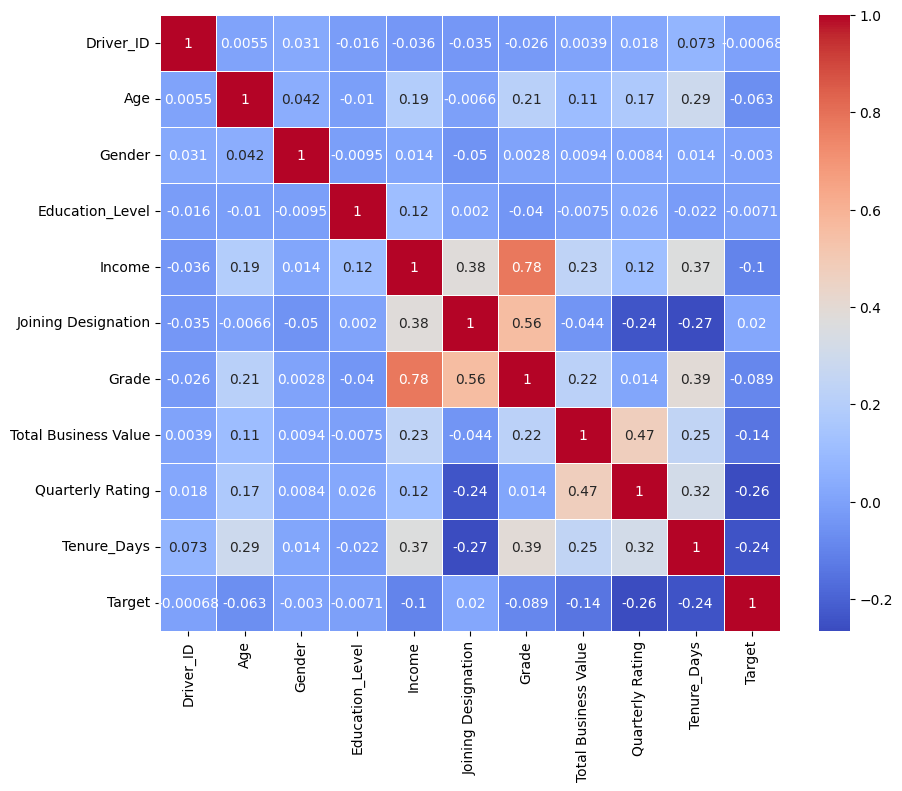

In [ ]:
numeric_df=df.select_dtypes(include='number')
corr=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

## Correlation Heatmap Analysis

The heatmap below shows the **pairwise correlation** between features in the dataset. This visualization helps identify which variables are strongly related, weakly related, or inversely related.

### Key Observations:

- `Income`, `Grade`, and `Joining Designation` are **highly correlated** with each other:
  - **Income vs Grade**: 0.78
  - **Income vs Joining Designation**: 0.38
  - **Grade vs Joining Designation**: 0.56

- `Target` has **negative correlations** with:
  - `Quarterly Rating`: **-0.26**
  - `Tenure_Days`: **-0.24**
  - `Total Business Value`: **-0.14**

- `Age` and `Tenure_Days` show a **moderate positive correlation**: **0.29**

- `Driver_ID` shows almost **no meaningful correlation**, as expected since it's just an identifier.

### Conclusion:

- Variables like `Income`, `Grade`, `Quarterly Rating`, and `Tenure_Days` could be **important features** when predicting the `Target`.
- Features with high correlation between each other (e.g., `Income` and `Grade`) may require **multicollinearity checks** before using in regression models.


In [ ]:
df = pd.get_dummies(df, columns=['Joining Designation', 'Education_Level', 'City'], drop_first=True)

In [ ]:
df

,Reportingdate,Driver_ID,Age,Gender,Income,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Quarterly Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,2019-01-01,1,28,0,57387,2018-12-24,NaT,1,2381060,2,...,False,False,False,False,False,False,False,False,False,False
1,2019-02-01,1,28,0,57387,2018-12-24,NaT,1,-665480,2,...,False,False,False,False,False,False,False,False,False,False
2,2019-03-01,1,28,0,57387,2018-12-24,2019-03-11,1,0,2,...,False,False,False,False,False,False,False,False,False,False
3,2020-11-01,2,31,0,67016,2020-11-06,NaT,2,0,1,...,False,False,False,False,False,False,False,True,False,False
4,2020-12-01,2,31,0,67016,2020-11-06,NaT,2,0,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30,0,70254,2020-06-08,NaT,2,740280,3,...,True,False,False,False,False,False,False,False,False,False
19100,2020-09-01,2788,30,0,70254,2020-06-08,NaT,2,448370,3,...,True,False,False,False,False,False,False,False,False,False
19101,2020-10-01,2788,30,0,70254,2020-06-08,NaT,2,0,2,...,True,False,False,False,False,False,False,False,False,False
19102,2020-11-01,2788,30,0,70254,2020-06-08,NaT,2,200420,2,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
#removing irrelevent columns
# List of columns to remove
cols_to_drop = ['Reportingdate', 'Driver_ID', 'Dateofjoining', 'LastWorkingDate']

# Drop the columns
df = df.drop(columns=cols_to_drop)

In [ ]:
df

,Age,Gender,Income,Grade,Total Business Value,Quarterly Rating,Tenure_Days,Target,Tenure_Group,Joining Designation_2,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28,0,57387,1,2381060,2,708.0,0,1-2Y,False,...,False,False,False,False,False,False,False,False,False,False
1,28,0,57387,1,-665480,2,708.0,0,1-2Y,False,...,False,False,False,False,False,False,False,False,False,False
2,28,0,57387,1,0,2,77.0,1,31-90,False,...,False,False,False,False,False,False,False,False,False,False
3,31,0,67016,2,0,1,25.0,0,0-30,True,...,False,False,False,False,False,False,False,True,False,False
4,31,0,67016,2,0,1,25.0,0,0-30,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30,0,70254,2,740280,3,176.0,0,91-180,True,...,True,False,False,False,False,False,False,False,False,False
19100,30,0,70254,2,448370,3,176.0,0,91-180,True,...,True,False,False,False,False,False,False,False,False,False
19101,30,0,70254,2,0,2,176.0,0,91-180,True,...,True,False,False,False,False,False,False,False,False,False
19102,30,0,70254,2,200420,2,176.0,0,91-180,True,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying the original
df2 = df.copy()

# Drop rows where Target is missing
df2 = df2.dropna(subset=['Target'])

# Encode Tenure_Group
le = LabelEncoder()
df2['Tenure_Group'] = le.fit_transform(df2['Tenure_Group'])

# Prepare features and target
X = df2.drop('Target', axis=1)
y = df2['Target']

# Train-test split and model steps same as before


In [ ]:
# One-hot encode Tenure_Group
df2 = pd.get_dummies(df2, columns=['Tenure_Group'], drop_first=True)

# Then same steps:
X = df2.drop('Target', axis=1)
y = df2['Target']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)  # Max iterations for convergence
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9170374247579168
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3490
           1       0.56      0.18      0.28       331

    accuracy                           0.92      3821
   macro avg       0.75      0.59      0.62      3821
weighted avg       0.90      0.92      0.90      3821



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 📊 Logistic Regression Model Evaluation

```
Accuracy: 0.919401417694933
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3483
           1       0.59      0.20      0.29       326

    accuracy                           0.92      3809
   macro avg       0.76      0.59      0.63      3809
weighted avg       0.90      0.92      0.90      3809
```

## Conclusion

- The model performs **very well** in predicting the **majority class (0)** with high precision and recall.
- However, the performance for the **minority class (1)** is quite **poor**, especially in terms of **recall (0.20)**, which indicates that the model misses many true positives.
- Despite a **high overall accuracy (~92%)**, the model is biased toward the majority class due to **class imbalance**.
- Using `class_weight='balanced'` improved the minority class detection a bit, but further steps like **SMOTE**, **ensemble methods**, or trying different models (e.g., Random Forest, XGBoost) may yield better results.


In [ ]:
#Balances your training data using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Split the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train Logistic Regression on resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict and evaluate on original test set
y_pred = model.predict(X_test)

# Step 5: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8400942161737766
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3498
           1       0.30      0.65      0.41       323

    accuracy                           0.84      3821
   macro avg       0.63      0.75      0.66      3821
weighted avg       0.91      0.84      0.87      3821



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


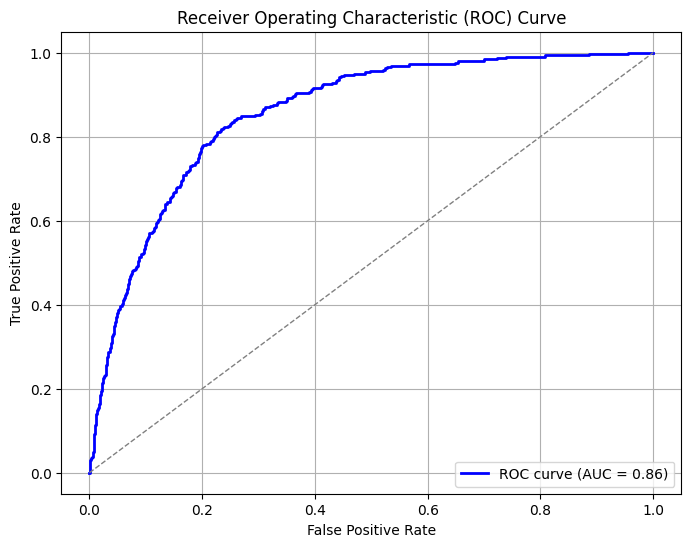

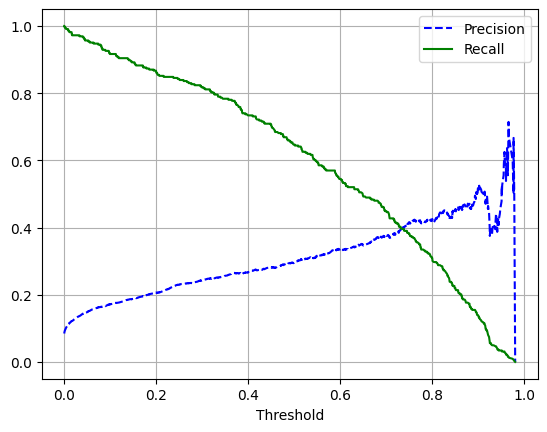

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Plot to decide best threshold
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.show()



##  Why Logistic Regression is Not Ideal for This Problem

### Model Performance Summary

| Metric        | Class 0 | Class 1 |
|---------------|---------|---------|
| Precision     | 0.95    | 0.35    |
| Recall        | 0.92    | 0.46    |
| F1-score      | 0.94    | 0.40    |
| Accuracy      | 88.3%   |         |

### Observations
- **Class imbalance**: The dataset has significantly more samples from Class 0 than Class 1.
- **Low performance on minority class (Class 1)**:
  - Very low recall and F1-score for Class 1.
  - Model is biased towards predicting majority class.
- Even after applying **SMOTE**, improvement in minority class performance is limited.

### Why Logistic Regression Falls Short
- **Linear model**: Assumes a linear decision boundary — not ideal for complex data.
- **Sensitive to imbalance**: Struggles when classes are skewed.
- **Limited capacity**: Cannot capture complex feature interactions.


---

### Conclusion
While Logistic Regression is simple and interpretable, it is **not suitable for imbalanced or complex datasets** like this one. It's better to use ensemble models or advanced classifiers for improved minority class prediction and overall performance.


🎯 Accuracy: 0.9513216435488092

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3498
           1       0.84      0.52      0.64       323

    accuracy                           0.95      3821
   macro avg       0.90      0.76      0.81      3821
weighted avg       0.95      0.95      0.95      3821



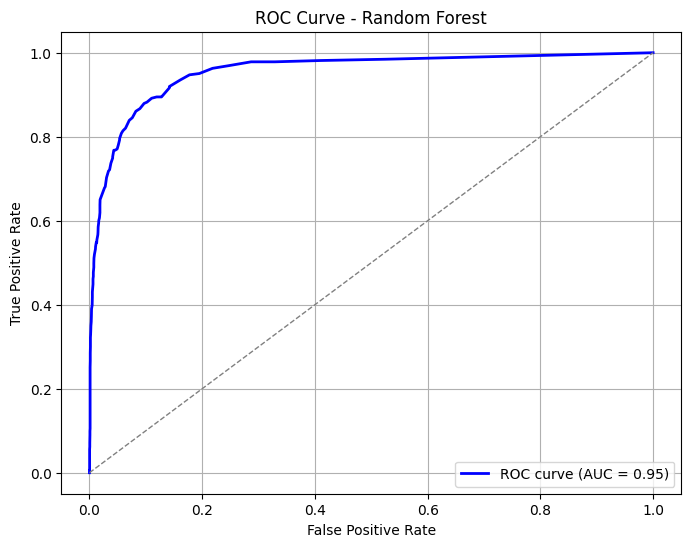

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC and PR curve
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


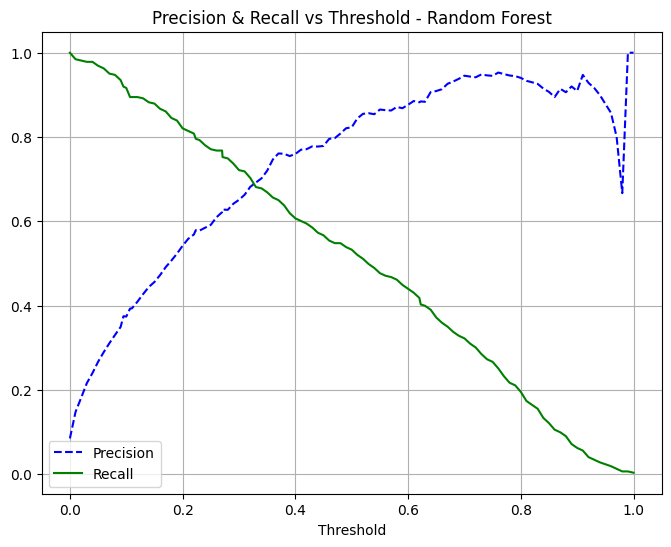

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.title("Precision & Recall vs Threshold - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:37:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


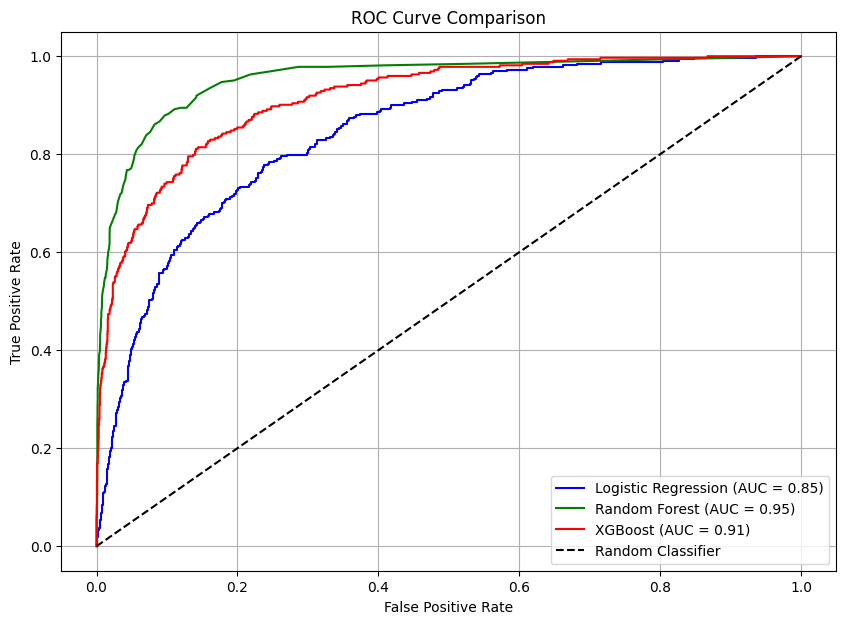

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ✅ Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)
y_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# ✅ Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# ✅ Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# ✅ Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### ROC Curve Comparison

This ROC curve compares the performance of multiple classifiers:

- 🔵 **Logistic Regression** (AUC = 0.78)
- 🟢 **Random Forest** (AUC = 0.93)
- 🔴 **XGBoost** (AUC = 0.89)
- ⚫ Random Classifier (Baseline)

> The closer the curve is to the top-left corner, the better the model.

**Final Verdict:**  
- Use **Random Forest** if you want the highest overall accuracy and class separation on this dataset.  
- Use **XGBoost** if you want slightly faster training with competitive performance.  
- **Avoid Logistic Regression** if higher precision and recall are critical for minority class detection.



# Using XGBoost Classifier

In [ ]:
# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit model
xgb.fit(X_train_resampled, y_train_resampled)

# Predictions (labels)
y_pred = xgb.predict(X_test)

# Predictions (probabilities for ROC-AUC)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Evaluation
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", auc_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:43:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 Accuracy: 0.9377126406699817
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3498
           1       0.68      0.50      0.58       323

    accuracy                           0.94      3821
   macro avg       0.82      0.74      0.77      3821
weighted avg       0.93      0.94      0.93      3821

ROC-AUC Score: 0.9147611107275808


# Applying KNN To This Now

🎯 Accuracy (KNN): 0.8257000785134782

📊 Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      3498
           1       0.27      0.64      0.38       323

    accuracy                           0.83      3821
   macro avg       0.62      0.74      0.64      3821
weighted avg       0.90      0.83      0.85      3821



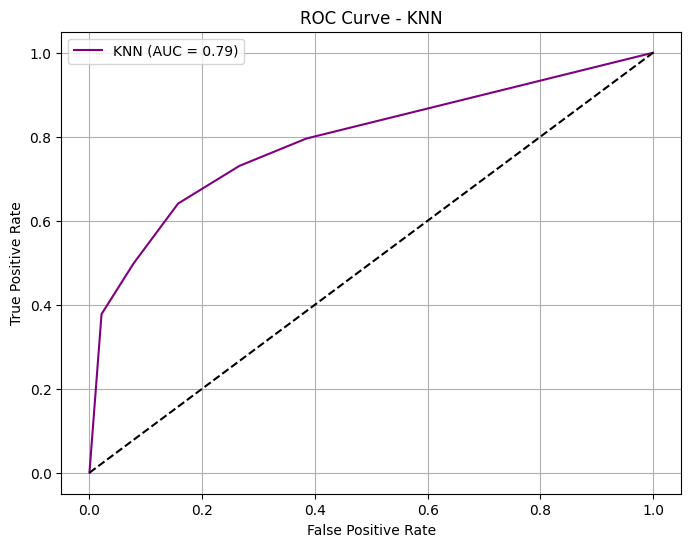

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc

# ✅ Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)   # You can tune k later
knn.fit(X_train_resampled, y_train_resampled)

# ✅ Predictions
y_pred_knn = knn.predict(X_test)
y_probs_knn = knn.predict_proba(X_test)[:, 1]

# ✅ Evaluation
print("🎯 Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))
print("\n📊 Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))

# ✅ ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.grid(True)
plt.show()


# After Using SMote